#Import required packages

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [50]:
#seed random number generator of numpy for reproducibility
np.random.seed(1000)

#Data Generation

1. Generate 10 two-dimensional data points from a multi-variate Gaussian distribution with mean [0,0] and identity covariance matrix. Label data points as class +1. Consider this labeled data set as $D_1$.  ($\textbf{Hint:}$ Use numpy.random.multivariate_normal)

In [51]:
#Generate D_1
mean = [0,0]
cov = [[1,0], [0,1]] # identity covariance matrix
size = 10

D_1 = np.random.multivariate_normal(mean, cov, size) # Input generation

y_1 = np.full((10,1),1) # Class = +1

D_1 = np.concatenate((D_1,y_1),1) # Augment

2. Generate 10 two-dimensional data points from a multi-variate Gaussian distribution with mean [-2,-2] and identity covariance matrix. Label data points as class -1. Consider this labeled data set as $D_2$.

In [52]:
#Generate D_2
mean = [-2,-2]
cov = [[1,0], [0,1]]
size = 10

D_2 = np.random.multivariate_normal(mean, cov, size) # Input generation

y_2 = np.full((10,1),-1) # Class = -1

D_2 = np.concatenate((D_2,y_2),1) # Augment

3. Construct $D=D_1 \cup D_2$. Shuffle the data in $D$. (Hint: Use random.shuffle().)

In [53]:
#Construct D and shuffle.
D = np.concatenate((D_1,D_2), axis = 0)
np.random.shuffle(D)
D

array([[-2.82294096, -0.39991663, -1.        ],
       [ 0.5950355 , -0.46466753,  1.        ],
       [-3.61798224, -1.13273918, -1.        ],
       [-0.18237734,  0.10319289,  1.        ],
       [-1.68788199, -0.46683893, -1.        ],
       [-0.8044583 ,  0.32093155,  1.        ],
       [ 0.66728131, -0.80611561,  1.        ],
       [-0.02548288,  0.64432383,  1.        ],
       [-2.0692813 , -1.91679051, -1.        ],
       [-1.19606983, -0.40596016,  1.        ],
       [-2.55017387, -2.38314741, -1.        ],
       [-2.33483545, -2.0994817 , -1.        ],
       [-0.1074373 , -0.47998308,  1.        ],
       [ 1.27179528, -0.98674733,  1.        ],
       [-1.5928079 , -1.08061246, -1.        ],
       [-0.30079667,  0.38947455,  1.        ],
       [-2.32692468, -2.04579719, -1.        ],
       [-2.078659  , -2.58206572, -1.        ],
       [-0.13842199,  0.70569237,  1.        ],
       [-2.30446006, -0.07698987, -1.        ]])

#Data Visualization

Write code to visualize the data $D$ you have generated. Use different colors for different classes. (Use matplotlib.pyplot.scatter to plot the points.)

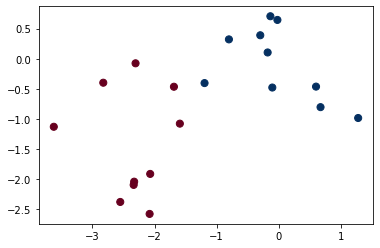

In [54]:
def plot_data(data):
  #write code to plot the data points. Use different colors for different classes.
  plt.scatter(data[:,0], data[:,1], c=data[:,2], s=50, cmap='RdBu')

plot_data(D)

#Perceptron prediction function

Write code to implement the prediction rule used in Perceptron. (Use the numpy function which helps in computing the dot product between two vectors.)

In [55]:
def perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    prediction = 0
    if(np.dot(w,x)>=0):
      prediction = 1
    else:
      prediction = -1
    return prediction

#Function to update weights 

Write code to implement the update rule for updating weights in perceptron learning algorithm. If there is a mistake in prediction made by perceptron, return is_mistake as True, otherwise return is_mistake as False. 

In [56]:
def perceptron_update_weights(w, x, y, y_pred):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    if(y_pred!=y):
      is_mistake = True
    #and write code to update the weights in perceptron 
    if(is_mistake):
      w = w + y*x
    return w, is_mistake

#Training procedure for perceptron

Complete the training procedure to train perceptron by adding appropriate code where required.

In [57]:
def train_perceptron(data):
    #Initialize weights 

    w = np.zeros(shape = data.shape[1]) # zero initialization ; try next with random generation

    epochs=0 # useful for executing multiple passes over a finite data set
    num_mistakes = 99 #some dummy value to get the while loop going 
    max_epochs = 50 

    while num_mistakes > 0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            one = np.array([1])
            x = np.concatenate((x,one), 0)
             
            y_hat = perceptron_prediction(w, x)
            
            #retrieve the label y for x from data set D 
            y = data[i,2]
            
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            
            if is_mistake:
              num_mistakes += 1

        epochs=epochs+1
    return w

#Plotting the separating line

Write code to plot the separating line along with the data.

In [58]:
def plot_data_with_separator(data, w):
  #write required code. (You can reuse the code written for plotting the data points.)
  plt.scatter(data[:,0], data[:,1], c=data[:,2], s=50, cmap='RdBu')

  w0 = w[2]
  w1 = w[0]
  w2 = w[1]
  
  x = np.linspace(-4,2,100)
  y = (-1)*(w0/w2) - (w1/w2)*x

  plt.plot(x, y, '-r')
  pass

#Calling the Perceptron train function.

In [59]:
w_final = train_perceptron(D)    
 

#Calling the plot function to plot separator

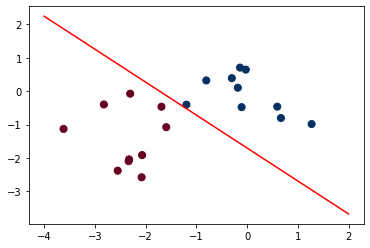

In [60]:
plot_data_with_separator(D, w_final)

#Additional functionality (Optional):

Illustrate the behavior of the separating line between the updates as contiguous plots or as animation. Highlight the data points which cause the update in the separating line orientations.



<Figure size 432x288 with 0 Axes>